In [23]:
import gspread
import pandas as pd
from oauth2client.service_account import ServiceAccountCredentials
from googleapiclient.discovery import build

In [162]:
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
# defining the scope of the application
scope_app = ['https://spreadsheets.google.com/feeds','https://www.googleapis.com/auth/drive'] 

#credentials to the account
cred = ServiceAccountCredentials.from_json_keyfile_name('baby-sleep-war-89c8dcb4a508.json',scope_app) 

# authorize the clientsheet 
client = gspread.authorize(cred)

In [114]:
def print_all(text):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
        # more options can be specified also
        print(text)

In [ ]:
spreadsheet_id = '1l-bLCA0f4gsYgnDE6aeoTM9nH5uuc48Z1zRw9uHTNjo'
range_name = 'A1:BA1000'
#sh = client.open('baby-sleep_war')

service = build('sheets', 'v4', credentials=cred)
result = service.spreadsheets().values().get(spreadsheetId=spreadsheet_id, range=range_name).execute()
answers = result.get('values', [])
print(f"{len(answers)} rows retrieved")

df=pd.DataFrame(answers[1:], columns=answers[0])
print(df.head())

In [157]:
df

,Отметка времени,Адрес электронной почты,1. У якому населеному пункті України ви проживали до 24 лютого 2022 року?,2. Скільки зараз вашій (молодшій) дитині? Дата народження у форматі дд.мм.рррр,3. Стать (молодшої) дитини,"4. Якщо у вас більше, ніж одна дитина, вкажіть вік (дати народження) старших дітей. \nЯкщо у вас тільки 1 дитина, поставте ""-"", будь ласка","5. Стать старшої дитини (дітей). Якщо у вас тільки 1 дитина, поставте ""-""",6. Який тип вигодовування у вашої (молодшої) дитини?,"7. Чи є особливості стану здоров’я дитини, на які ви звертали увагу до 24 лютого?","8. Як ви б оцінили сон вашої дитини до 24 лютого? (від 1 до 5, де 1 – жахливий сон, 5 – чудовий сон)?",...,44. Дохід вашої родини відносно інших громадян України ви можете оцінити як:,45. Який зараз статус ваших стосунків,"46. Чи є у вас питання, на які б ви хотіли отримати відповіді від мене?","47. Що, на вашу думку, могло б вас зараз підтримати?","48. Чи є якесь повідомлення, яке б ви хотіли передати міжнародній спільноті, якій я буду розповідати про те, як зараз українські батьки переживають важкі події разом з малюком?",49. Я погоджуюся на анонімне публічне цитування своїх розширених відповідей на деякі питання цієї анкети,50. Я даю дозвіл на обробку даних із цієї анкети для подальшого аналізу та публікації результатів,51. Чи бажаєте ви отримати результати дослідження чи відповіді на ваші запитання на вашу електронну пошту?,city,city_raw
0,19.08.2022 23:49:28,nata003@ukr.net,Київ,02.08.2016,Дівчинка,03.01.2013,Хлопчик,Вже перейшли на дорослу їжу,Ні,5,...,Середній,У шлюбі,Дякую,"Впевненість у тому, що не доведеться більше по...",Кожна родина з дитиною після 24 лютого пережив...,Так,Так,"Так, відповіді і результати дослідження",київ,київ
1,20.08.2022 12:31:46,raspberrynata458@gmail.com,Київ,07.03.2011,Дівчинка,1,1,Вже перейшли на дорослу їжу,"Ні, але після початку війни проявилась в повно...",5,...,Середній,Проживаю сам (-а) з дитиною,"Якщо буде потреба, залюбки замовлю консультаці...",Наша перемога. Але непогано підтримують і мале...,"Дуже дякую всім країнам, які долучились до рят...",Так,Так,"Так, відповіді і результати дослідження",київ,київ
2,22.08.2022 22:50:44,dariakost3@gmail.com,Київ,15.07.2005,Дівчинка,17.09.2001,Жіноча,Вже перейшли на дорослу їжу,Ні,5,...,Середній,У шлюбі,,,,Так,Так,"Так, відповіді і результати дослідження",київ,київ
3,23.08.2022 15:44:56,missis.rich@gmail.com,Київ,04.11.2016,Дівчинка,-,-,Вже перейшли на дорослу їжу,Деякі невротичні прояви,5,...,Вище середнього,У шлюбі,-,"Розуміння, що ядерного взриву не буде","Ми живемо у постійній напрузі, із фоновою трив...",Так,Так,"Так, відповіді і результати дослідження",київ,київ
4,23.08.2022 17:39:12,lena.siryk2013@gmail.com,Київ,23.07.2021,Дівчинка,-,-,Грудне вигодовування + прикорм,Алергія на бкм,3,...,Вище середнього,У шлюбі,,,,Так,Так,"Так, тільки результати дослідження",київ,київ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,25.08.2022 10:27:03,newyull@ukr.net,Черкаси,18.07.2021,Хлопчик,-,-,Грудне вигодовування + прикорм,Атопічний дерматит,3,...,Середній,У шлюбі,Ні,Наша беззаперечна перемога,"Ця війна стосується кожного, навіть того, хт...",Так,Так,"Так, відповіді і результати дослідження",черкаси,черкаси
341,25.08.2022 10:28:37,elena.veretilo@gmail.com,Харків,05.06.214,Дівчинка,-,-,Вже перейшли на дорослу їжу,Більш тривожна та більш вразлива до звичайних ...,5,...,Середній,У шлюбі,,"Перемога і щоб в я русня , що прийшла на нашу ...",Необхідна підтримка України повсякчасно,Так,Так,"Так, відповіді і результати дослідження",харків,харків
342,25.08.2022 10:29:23,noa.yanovskaya@gmail.com,Харків,29.12.2020,Дівчинка,"""-""","""-""",Змішане вигодовування + прикорм,"""-""",3,...,Вище середнього,У шлюбі,"""-""",Приїзд батьків,"Тримайтеся, заради майбутьнього наших дітей!",Так,Так,"Так, відповіді і результати дослідження",харків,харків
343,25.08.2022 10:30:03,yanuska0509@gmail.com,СВІТЛОВОДСЬК,10.05.2022,Хлопчик,-,-,Грудне вигодовування,Ні,3,...,Се

In [226]:
# TODO: write to function

city = df['1. У якому населеному пункті України ви проживали до 24 лютого 2022 року?']

city = city.str.lower()

dic1 = {'одеська область, білгород-дністровський район, с. тузли': 'тузли',
        'м.підгородне,дніпропетровська обл.':'підгородне',
        'с. високий, харківський район, харківська область':'високий',
        'місто бердянск запорізької області, але на момент початку війни я з сімєю гостила у моєї мав німеччині.':'бердянськ',
        'львівська область, яворівський р-н с.кам‘янобрід':'кам‘янобрід',
        'смт коцюбинське, бучанський район, київська обл':'коцюбинське',
        'козин, київська обл, обухівський р-н':'козин',
        'с. лука, бучанський р-н, київська область':'лука',
        'бобриця, бучанський район':'бобриця'
        }
dic2 = {', полтавська область': '',
        #'київська область': '',
        'київська обл':'',
        'закарпатська обл':'',
        'чернігівська обл':'',
        #'полтавська область':'',
        'полтавська обл':'',
        ' харківськаобл':'',
        'харківський район':'',
        'дніпропетровська обл':'',
        'дніпоопетровська обл':'',
        'львівська обл':'',
        'закарпатська обл':'',
        '(дніпропетровська)':'',
        'одеська обл':'',
        'місто':'', 
        'м. ': '',
        'с. ':'',
        'київ1':'київ',
        'київґ':'київ',
        'м.київ':'',
        'м.дніпро':'',
        'харів':'харків',
        'кременчуці':'кременчук',
        'івано-франківську':'івано-франківськ',
        'запорожье':'запоріжжя',
        'пп':'',
        'смт. ':'',
        'киев':'київ',
        'харьков':'харьків'
        }
#punct = ['.', ',', ' ', '(', ')', '"']
city = city.str.strip()
df['city_raw'] = df['1. У якому населеному пункті України ви проживали до 24 лютого 2022 року?'].str.strip()
df['city_raw'] = df['city_raw'].str.lower() #.replace(dic1, regex=True)
city = city.replace(dic1)
city = city.replace(['область','облачть'], 'обл', regex=True)
#city = city.replace(dic1, regex=True)
city = city.replace(dic2, regex=True)
city = city.str.replace('[^\w\s]','')
#city = city.replace(to_replace=punct, value='', regex=True)
city = city.str.lstrip()
print('Кількість населених пунктів серед респондентів:', len(city.unique()))

df_city = city.value_counts()
print_all(df_city)
"""
print_all(df[['city_raw', 'city']])
"""
df['city'] = city
df[['city_raw', 'city']].to_csv(r'city.csv', index = False)




Кількість населених пунктів серед респондентів: 93
київ                                                                                            92
харків                                                                                          42
дніпро                                                                                          26
львів                                                                                           20
кременчук                                                                                       18
одеса                                                                                           13
житомир                                                                                          6
запоріжжя                                                                                        5
харьків                                                                                          5
вінниця                                                   

C:\Users\afedorova\AppData\Local\Temp\ipykernel_12792\3144053711.py:56: FutureWarning: The default value of regex will change from True to False in a future version.
  city = city.str.replace('[^\w\s]','')


In [ ]:
# TODO: plot names of cities with hue=value_count()

In [159]:
df.columns

Index(['Отметка времени', 'Адрес электронной почты',
       '1. У якому населеному пункті України ви проживали до 24 лютого 2022 року?',
       '2. Скільки зараз вашій (молодшій) дитині? Дата народження у форматі дд.мм.рррр ',
       '3. Стать (молодшої) дитини',
       '4. Якщо у вас більше, ніж одна дитина, вкажіть вік (дати народження) старших дітей. \nЯкщо у вас тільки 1 дитина, поставте "-", будь ласка ',
       '5. Стать старшої дитини (дітей). Якщо у вас тільки 1 дитина, поставте "-"  ',
       '6. Який тип вигодовування у вашої (молодшої) дитини?',
       '7. Чи є особливості стану здоров’я дитини, на які ви звертали увагу до 24 лютого? ',
       '8. Як ви б оцінили сон вашої дитини до 24 лютого? (від 1 до 5, де 1 – жахливий сон, 5 – чудовий сон)? ',
       '9. Як, на вашу думку, змінився сон вашої дитини у перший місяць повномасштабної війни від 24 лютого 2022 року? ',
       '10. Чи працювали ви над сном дитини до 24 лютого 2022 року?',
       '11. Чи залишали ви ваше місце п

Distribution of sleep quality before the war in %:
4    42.608696
5    31.014493
3    21.739130
2     3.478261
1     1.159420
Name: 8. Як ви б оцінили сон вашої дитини до 24 лютого? (від 1 до 5, де 1 – жахливий сон, 5 – чудовий сон)? , dtype: float64


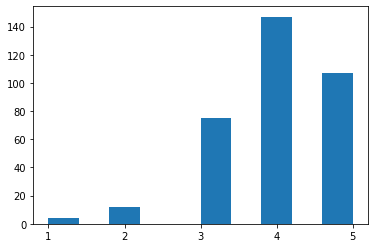

In [182]:
# sleep before the war
# TODO: sort

print('Distribution of sleep quality before the war in %:\n{}'.format(df["8. Як ви б оцінили сон вашої дитини до 24 лютого? (від 1 до 5, де 1 – жахливий сон, 5 – чудовий сон)? "].value_counts(normalize=True)*100))
plt.hist(df['8. Як ви б оцінили сон вашої дитини до 24 лютого? (від 1 до 5, де 1 – жахливий сон, 5 – чудовий сон)? '].sort_values())
plt.show()

In [ ]:
# TODO: calculate age of the children

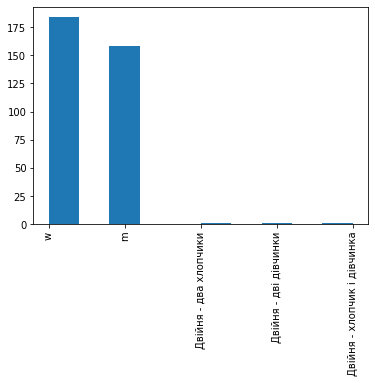

In [187]:
dic_gender = {'Дівчинка': 'w', 'Хлопчик':'m'}
df['genderYoungestChild'] = df['3. Стать (молодшої) дитини'].replace(dic_gender)
plt.hist(df['3. Стать (молодшої) дитини'])
plt.xticks(rotation=90)
plt.show()

In [211]:
# TODO: discuss, if ok for the first analysis to have just yes/no
# TODO: if "no + something" - cut the rest after no

df['7. Чи є особливості стану здоров’я дитини, на які ви звертали увагу до 24 лютого? '].value_counts()
df['healthState'] = df['7. Чи є особливості стану здоров’я дитини, на які ви звертали увагу до 24 лютого? '].str.lower()
df.healthState = df['healthState'].str.strip()
dic_healthState = {'-':'ні',
                    '"-"':'ні',
                    'немає':'ні',
                    'не має':'ні',
                    'нема':'ні',
                    'нет':'ні', 
                    'да': 'так'}
df.healthState = df.healthState.replace(dic_healthState)

In [212]:
df.healthState.value_counts(normalize=True)

ні                                                                                 0.750725
так                                                                                0.020290
атопічний дерматит                                                                 0.011594
дерматит                                                                           0.002899
розмовляє, плаче у сні, крутиться                                                  0.002899
                                                                                     ...   
так. кілька діагнозів, з них мігрень плюс на момент 24.02 ковід не легка форма.    0.002899
не ходить какати на горщик, довго і з плачем засинала.                             0.002899
вередлива і запальна                                                               0.002899
ні, не було.                                                                       0.002899
підвищена нервова збудженість, ємоційність                                      

In [189]:
df['11. Чи залишали ви ваше місце проживання разом з дітьми після 24 лютого? '].value_counts(normalize=True)

Так    0.771014
Ні     0.228986
Name: 11. Чи залишали ви ваше місце проживання разом з дітьми після 24 лютого? , dtype: float64

In [213]:
df['15. Скільки годин тривала ваша дорога до нового місця проживання? (цифра, годин) ']

0                                         2
1      7 годин при звичному часі в 2 години
2                                     7 діб
3                                   7 годин
4                                  4.5-5год
                       ...                 
340                                      48
341                               16 годин 
342                                      22
343                                       -
344                                      15
Name: 15. Скільки годин тривала ваша дорога до нового місця проживання? (цифра, годин) , Length: 345, dtype: object

In [215]:
df['19. Чи був у вас досвід сну з дитиною у бомбосховищі/підвалі? '].value_counts()

Так                                                  132
Ні, ми не були і сховищі з дитиною                   125
Ні, ми були там з дитиною тільки під час неспання     88
Name: 19. Чи був у вас досвід сну з дитиною у бомбосховищі/підвалі? , dtype: int64

In [ ]:
# translation to latin script

columns_eng = ['timestamp'
                'email',
                'townBeforeWar',
                'dateBirthYoungestChild']